We will use logistic regression with gradient descent here to maximise the likelihood, which is same as minimizing -ve log likelihood, we had two ways to do so,


*   Analytical method -> to use derivates and calculate maxima
*   Gradient descent -> to reach the correct height 

I have used Gradient descent with the CDF Function is place of Logitic function as we were asked specifically to do so in the problem statement.

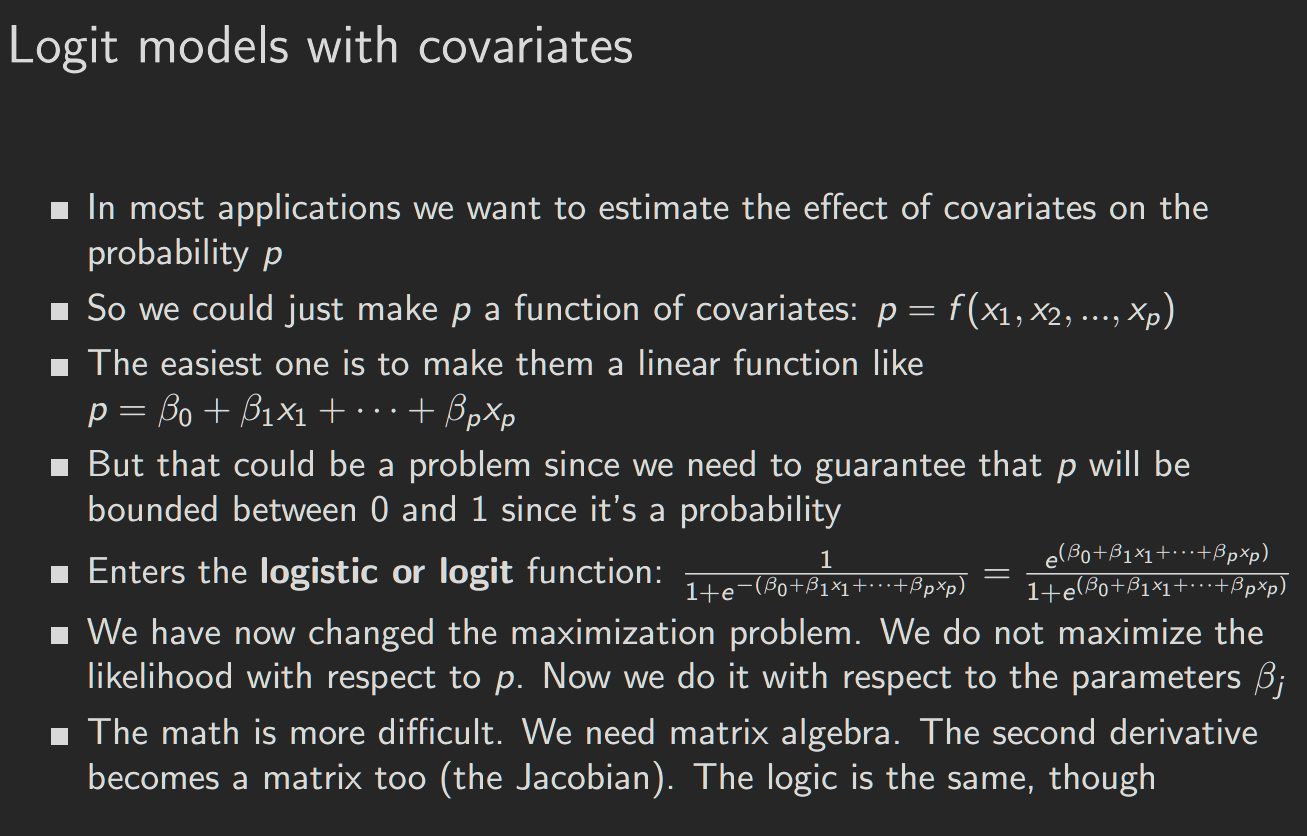










Here I have use f to be CDF in place of logit function to calculate the probability.(can also use pdf), but any normal function less than 1 would work.  

Then using log of likhlihood as its easier to work with to minimise it( as its negative)
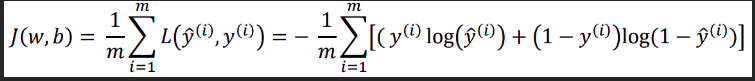




Then using gradient descent to minimise this function. with 1000 epoch and learning rate 0.05 
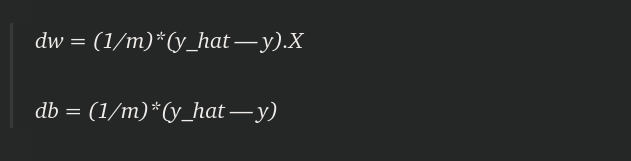

I normalised the data set by dividing with max-min , and then calculated the probability of survival of jack and Rose and sadly , jack had to die as his input was hopeless ;-;



***Firstly I have dont it using logistic library and then used the CDF with gradient desecent from scratch to implement my algorithm to find MLE.**


In [367]:
import numpy as np
import scipy.stats as st
import pandas as pd
data = pd.read_csv("titanic.csv")

In [368]:
data.head(10)


,Survived,(Intercept),Sexmale,Age,SibSp,Parch,Fare
0,0,1,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,1,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,1,1,35.0,0,0,8.0500
5,0,1,1,54.0,0,0,51.8625
6,0,1,1,2.0,3,1,21.0750
7,1,1,0,27.0,0,2,11.1333
8,1,1,0,14.0,1,0,30.0708
9,1,1,0,4.0,1,1,16.7000


In [369]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.0,1.0000
(Intercept),712.0,1.000000,0.000000,1.00,1.00,1.00000,1.0,1.0000
Sexmale,712.0,0.636236,0.481420,0.00,0.00,1.00000,1.0,1.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.0,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.0,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.0,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.0,512.3292


In [370]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     712 non-null    int64  
 1   (Intercept)  712 non-null    int64  
 2   Sexmale      712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 39.1 KB


In [371]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


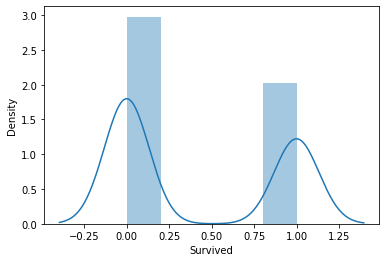

In [372]:
sns.distplot(data['Survived'])

In [373]:
data.columns

Index(['Survived', '(Intercept)', 'Sexmale', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [374]:
norm_age= (data['Age'].max()-data['Age'].min())
norm_sibsp = (data['SibSp'].max()-data['SibSp'].min())
norm_parch = (data['Parch'].max()-data['Parch'].min())
norm_fare= (data['Fare'].max()-data['Fare'].min())

In [375]:
data['Age']= data['Age']/(data['Age'].max()-data['Age'].min())

In [376]:
data.head()

,Survived,(Intercept),Sexmale,Age,SibSp,Parch,Fare
0,0,1,1,0.276451,1,0,7.2500
1,1,1,0,0.477507,1,0,71.2833
2,1,1,0,0.326715,0,0,7.9250
3,1,1,0,0.439809,1,0,53.1000
4,0,1,1,0.439809,0,0,8.0500


In [377]:
data['Fare']= data['Fare']/(data['Fare'].max()-data['Fare'].min())

In [378]:
data['SibSp']= data['SibSp']/(data['SibSp'].max()-data['SibSp'].min())

In [379]:
data['Parch']= data['Parch']/(data['Parch'].max()-data['Parch'].min())

In [380]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,712.0,0.404494,0.491139,0.000000,0.000000,0.000000,1.000000,1.000000
(Intercept),712.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Sexmale,712.0,0.636236,0.481420,0.000000,0.000000,1.000000,1.000000,1.000000
Age,712.0,0.372482,0.182118,0.005278,0.251319,0.351847,0.477507,1.005278
SibSp,712.0,0.102809,0.186138,0.000000,0.000000,0.000000,0.200000,1.000000
Parch,712.0,0.072097,0.142364,0.000000,0.000000,0.000000,0.166667,1.000000
Fare,712.0,0.067471,0.103329,0.000000,0.015713,0.030539,0.064412,1.000000


In [381]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [382]:
y=data['Survived']
X=data.drop(['Survived'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [383]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [384]:
accuracy_score(y_pred, y_test)


0.774468085106383

In [385]:
confusion_matrix(y_pred, y_test)


array([[118,  29],
       [ 24,  64]])

In [386]:
from numpy.random import rand
import numpy as np
import scipy

In [387]:
from scipy.stats import norm

def CDF(z):     # to calculate the function of covariate from which we can CDF function and then use gradient descent to maximize it!
    # return 1 / (1 + np.exp(-z))
    # cdf = []
    # for a in z:
      # cdf.append(norm.cdf(z))

    return norm.cdf(z)

def log_likelihood(X, y, beta):     # toal likelihood of all observations -> also known as binary cross-entropy loss.            
    z = np.dot(X, beta)
    class_1 = y * np.log(CDF(z))    
    class_2 = (1 - y) * np.log(1 - CDF(z))
    return -sum(class_1 + class_2) / len(X)

def fit(X, y,epochs=25, lr=0.05):        # gradient descent to find MLE by numerical method.
    loss = []
    beta = rand(X.shape[1])
    N = len(X)
              
    for _ in range(epochs):        
        # Gradient Descent
        y_hat =CDF(np.dot(X, beta))
        beta -= lr * np.dot(X.T,  y_hat - y) / N            
        # Saving Progress
        loss.append(log_likelihood(X, y, beta)) 
        
    return (beta,loss)

def predict(X,beta):        
    # Predicting with CDF function
    z = np.dot(X, beta)
    # Returning binary result
    return [1 if i > 0.5 else 0 for i in CDF(z)]   # doing classification at the end to realize Y from y






In [388]:
beta, loss = fit(X_train,y_train,1000,0.05)  # gradient descent to find MLE with learning rate 0.1 and epoch 10.

The below are the MLE of beta calculated by maximizing the log likhlihood logitic function  

In [389]:
beta

array([ 0.52368138, -1.367981  ,  0.04515335, -0.17886527,  0.63752082,
        0.56499597])

In [390]:
loss[-10]

0.5194243821780677

In [391]:
  y_hat=predict(X_test,beta)

In [392]:
y_hat

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [393]:
accuracy_score(y_test,y_hat)

0.7787234042553192

In [394]:
log_likelihood(X_train,y_train,beta)

0.5192835105832746

In [395]:
X.columns

Index(['(Intercept)', 'Sexmale', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [396]:
def normalis(x):
  x[2]=x[2]/norm_age
  x[3]=x[3]/norm_sibsp
  x[4]=x[4]/norm_parch
  x[5]=x[5]/norm_fare
  return x

In [397]:
def pred_single(x,beta):
  z = np.dot(x,beta)
  fz = CDF(z)
  return fz

In [398]:
jack =[1 ,1 ,20, 0, 0, 7.5]
rose =[1 ,0 ,19, 1, 1, 520]
jack = normalis(jack)
rose = normalis(rose)


In [399]:
pred_single(jack,beta)

0.20477644154903824

In [400]:
pred_single(rose,beta)

0.880680940034799

In [401]:
# as is clearly evident that rose survival was written by statistic so she had to survive and poor jack had to die ;-;

